# Support Vector Machines from scratch

In [281]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix as cvxmat
from cvxopt import solvers as solver
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [201]:
X, y = make_blobs(n_samples=200, n_features=2, centers=2)

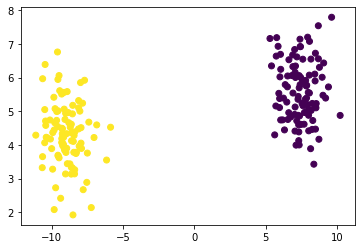

In [202]:
plt.scatter(X[:, 0], X[:, 1], c=y)

$$
    \large
    \boldsymbol{K}_{ij} = \phi(\boldsymbol{x}_i)^\top \phi(\boldsymbol{x}_j)
$$

$$
    \large
    \max_{\boldsymbol{\sigma}; \boldsymbol{\sigma} \geq 0}  \sum_{i=1}^{N}\sigma_i - \frac{1}{2} \sum_{i=1}^{N}\sum_{j=1}^{N} \sigma_i \sigma_j y_i y_j \boldsymbol{K}_{ij} \\
    \large
    \min_{\boldsymbol{\sigma}; \boldsymbol{\sigma} \geq 0}  \frac{1}{2} \sum_{i=1}^{N}\sum_{j=1}^{N} \sigma_i \sigma_j y_i y_j \boldsymbol{K}_{ij} -  \sum_{i=1}^{N}\sigma_i  
$$


$$
\large
    P_{ij} = y_i y_j \phi(\boldsymbol{x}_i)^\top\phi(\boldsymbol{x}_j)
$$

$$
    \large
    \boldsymbol{w} = \sum_{i=1}^{N} y_i \sigma_i\phi(\boldsymbol{x}_i)
$$

$$
    \large
    b = y_s - \sum_{m \in S} \sigma_m y_m \phi(\boldsymbol{x}_m)^\top \phi(\boldsymbol{x}_s) \\
    \text{where} \; S \; \text{is the set of support vectors such as} \; \sigma_i > 0
$$

- Compute $\boldsymbol{P}$.
- Compute $\boldsymbol{w}$.
- Find the support vectors $S$ by finding any data point where $\sigma_i > 0$.
- Compute $b$.
- To predict, compute:
$$
    \large
    y_{test} = \text{sign}\left(\boldsymbol{w}^\top \phi({\boldsymbol{x}_{test}}) + b \right)
$$

CVXOPT form:
$$
    \min \frac{1}{2} \boldsymbol{x}^\top\boldsymbol{P}\boldsymbol{x} + \boldsymbol{q}^\top\boldsymbol{x}\\
    \text{s.t.} \\
    \boldsymbol{G}\boldsymbol{x} \leq h \\
    \boldsymbol{A}\boldsymbol{x} = 0
$$

In matrix form the dual optimization is:
$$
    \min \frac{1}{2} \boldsymbol{\sigma}^\top \boldsymbol{P} \boldsymbol{\sigma} - 1^\top\boldsymbol{\sigma} \\
    \text{s.t.} \\
    - \sigma_i \leq 0 \\
    \boldsymbol{y}^\top \boldsymbol{\sigma} = 0
$$

In [233]:
def linear_kernel(X_1, X_2):
    return np.dot(X_1, X_2)

In [305]:
class SupportVectorClassifier():
    def __init__(self, kernel):
        self.kernel = kernel
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = self.kernel(X[i, :], X[j, :])
        q = cvxmat(np.ones((n_samples, 1)) * -1.)
        h = cvxmat(np.zeros((n_samples, 1)))
        G = cvxmat(np.eye(n_samples) * -1.)
        A = cvxmat(y.T)
        b = cvxmat(0.)
        P = cvxmat(np.outer(y, y) * K)
        
        sigma = np.array(solver.qp(P, q, G, h, A, b)['x'])
        
        sv_idx = sigma > 1e-5
        sv_sigma = sigma[sv_idx]
        sv_idx = np.squeeze(sv_idx)
        sv = X[sv_idx, :]
        sv_y = y[sv_idx]

In [306]:
st = StandardScaler()
X_s = st.fit_transform(X)
y_s = st.fit_transform(y)

svc = SupportVectorClassifier(linear_kernel)
svc.fit(X_s, y_s)

[[ 1.]
 [-1.]
 [-1.]]
